<a href="https://colab.research.google.com/github/Mabalzich/MLFinalProject/blob/main/MNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# imported libraries
# a lot are similar to homework 4
from tensorflow import keras
from keras import optimizers
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras import backend as K

In [34]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
learningrate = 0.0001

In [23]:
#recall function from keras documentation
def recallscore(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [24]:
#precision function from keras documentation
def precisionscore(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [25]:
#f1 score from keras documentation
def f1score(y_true, y_pred):
    precision = precisionscore(y_true, y_pred)
    recall = recallscore(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [26]:
def generate_data():
  # Load and read splited training and test data set
  (x_train, y_train), (x_test, y_test) = mnist.load_data()  
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)
  # normalize the data
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255

  # partition training set into training and validation set
  x_validate = x_train[50000:,:]
  x_train = x_train[:50000,:]
  y_validate = y_train[50000:,:]
  y_train = y_train[:50000,:]

  return x_train, y_train, x_validate, y_validate, x_test, y_test

In [27]:
x_train, y_train, x_validate, y_validate, x_test, y_test = generate_data()

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [28]:
def base_cnn():
  model = Sequential()

  model.add(Conv1D(28, 3, padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv1D(28, 3, padding='same'))
  model.add(Activation('relu'))

  model.add(MaxPooling1D(pool_size=2))

  model.add(Dropout(0.25))
 
  model.add(Conv1D(56, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(56, 3, padding='same'))
  model.add(Activation('relu'))

  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  opt = keras.optimizers.RMSprop(learning_rate=learningrate, decay=1e-6)

  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy', f1score, precisionscore, recallscore])
  print(model.summary())

  return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 28, 28)            2380      
                                                                 
 activation_36 (Activation)  (None, 28, 28)            0         
                                                                 
 conv1d_25 (Conv1D)          (None, 28, 28)            2380      
                                                                 
 activation_37 (Activation)  (None, 28, 28)            0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 14, 28)           0         
 g1D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 14, 28)            0         
                                                      

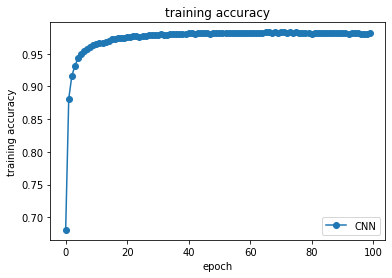

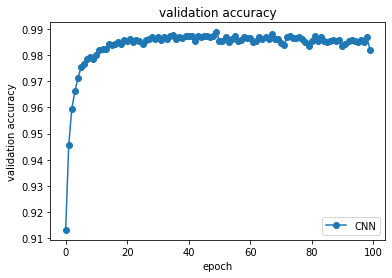

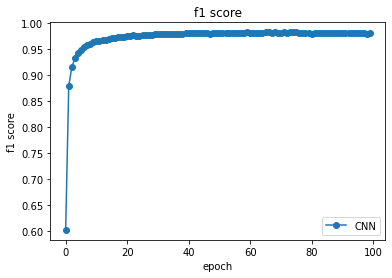

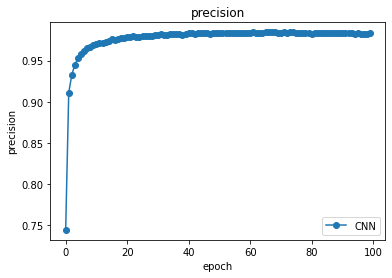

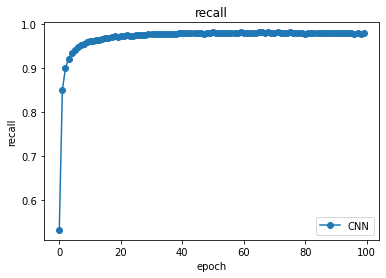

313/313 [==============================] - 2s 5ms/step - loss: 0.0682 - accuracy: 0.9833 - f1score: 0.9802 - precisionscore: 0.9888 - recallscore: 0.9721


In [35]:
model =  base_cnn()
fit = model.fit(x_train, y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_data=(x_validate, y_validate),
                                shuffle=True)

# Plot training accuracy
plt.plot(fit.history['accuracy'], 'o-', label='CNN')

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot validation accuracy
plt.plot(fit.history['val_accuracy'], 'o-', label='CNN')

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot f1 score
plt.plot(fit.history['f1score'], 'o-', label='CNN')

plt.title('f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot precision
plt.plot(fit.history['precisionscore'], 'o-', label='CNN')

plt.title('precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot recall
plt.plot(fit.history['recallscore'], 'o-', label='CNN')

plt.title('recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

#Evaluate best model
scores = model.evaluate(x_test, y_test, verbose=1)